In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
# load yen trade data
yen_futures = pd.read_csv("../Resources/yen.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)

In [5]:
# slice to 1/1/1990 & later
yen_futures = yen_futures.loc["1990-01-01":, :]
# yen_futures.head()

<AxesSubplot:xlabel='Date'>

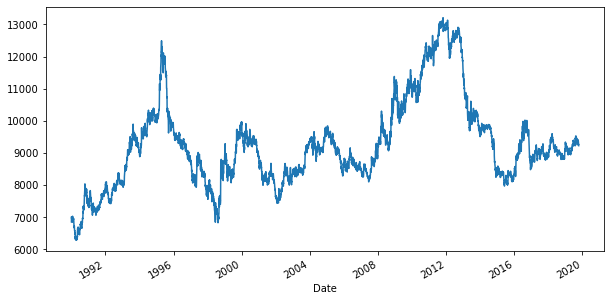

In [7]:
# Plot settle price & note lt/st patterns
yen_futures.Settle.plot(figsize=(10,5))

The settle price longterm appears to have a set pattern of a major spike followed by two smaller spikes. If this pattern continues, the settle price would be due in the short term for a major upspike.

In [ ]:
# Decomp noise & trend for Settle price with HP filter
import statsmodels.api as sm

ts_noise, ts_trend = sm.tsa.filters.hpfilter(yen_futures["Settle"])
